# Capstone 3: 
## Exploratory Data Analysis

## Data Information

- **Entity**: The name of the country or region for which the data is reported.
- **Year**: The year for which the data is reported, ranging from 2000 to 2020.
- **Access to electricity (% of population)**: The percentage of population with access to electricity.
- **Access to clean fuels for cooking (% of population)**: The percentage of the population with primary reliance on clean fuels.
- **Renewable-electricity-generating-capacity-per-capita**: Installed renewable energy capacity per person.
- **Financial flows to developing countries (US $)**: Aid and assistance from developed countries for clean energy projects.
  
- **Renewable energy share in total final energy consumption (%)**: Percentage of renewable energy in final energy consumption.
- **Electricity from fossil fuels (TWh)**: Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours.
- **Electricity from nuclear (TWh)**: Electricity generated from nuclear power in terawatt-hours.
- **Electricity from renewables (TWh)**: Electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours.
- **Low-carbon electricity (% electricity)**: Percentage of electricity from low-carbon sources (nuclear and renewables).
- **Primary energy consumption per capita (kWh/person)**: Energy consumption per person in kilowatt-hours.
- **Energy intensity level of primary energy (MJ/$2011 PPP GDP)**: Energy use per unit of GDP at purchasing power parity.
- **Value_co2_emissions (metric tons per capita)**: Carbon dioxide emissions per person in metric tons.
- **Renewables (% equivalent primary energy)**: Equivalent primary energy that is derived from renewable sources.
- **GDP growth (annual %)**: Annual GDP growth rate based on constant local currency.
- **GDP per capita**: Gross domestic product per person.
- **Density (P/Km²)**: Population density in persons per square kilometer.
- **Land Area (Km²)**: Total land area in square kilometers.
- **Latitude**: Latitude of the country's centroid in decimal degrees.
- **Longitude**: Longitude of the country's centroid in decimal degrees.

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [3]:
os.chdir('C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-3-Energy/data')
file_path = 'C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-3-Energy/data/energy_data_cleaned.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,Entity,Year,Electricity_Access,Clean_Cooking_Fuels,Renewable_Capacity,Financial_Flows,Renewable_Share,Fossil_Electricity,Nuclear_Electricity,Renewable_Electricity,...,CO2_Emissions,Renewables_Percentage,GDP_Growth,GDP_Per_Capita,Population_Density,Land_Area,Latitude,Longitude,Energy_Dependency,CO2_Intensity_Per_Capita
0,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,0.381716,0.31,0.0,0.63,...,0.000493,0.0,8.832278,0.001068,60.0,652230.0,33.93911,67.709953,-0.071982,-0.201462
1,Afghanistan,2004,20.064968,10.90,7.75,0.0,0.460641,0.33,0.0,0.56,...,0.000415,0.0,1.414118,0.001354,60.0,652230.0,33.93911,67.709953,-0.144614,-0.201667
2,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,0.352770,0.34,0.0,0.59,...,0.000627,0.0,11.229715,0.001779,60.0,652230.0,33.93911,67.709953,-0.119206,-0.201107
3,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,0.332049,0.20,0.0,0.64,...,0.000712,0.0,5.357403,0.002079,60.0,652230.0,33.93911,67.709953,-0.118777,-0.200881
4,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,0.299667,0.20,0.0,0.75,...,0.000717,0.0,13.826320,0.003408,60.0,652230.0,33.93911,67.709953,-0.110033,-0.200870


In [5]:
df.shape

(3142, 23)

In [6]:
df.describe()

,Year,Electricity_Access,Clean_Cooking_Fuels,Renewable_Capacity,Financial_Flows,Renewable_Share,Fossil_Electricity,Nuclear_Electricity,Renewable_Electricity,Low_Carbon_Electricity,...,CO2_Emissions,Renewables_Percentage,GDP_Growth,GDP_Per_Capita,Population_Density,Land_Area,Latitude,Longitude,Energy_Dependency,CO2_Intensity_Per_Capita
count,3142.000000,3142.000000,3142.000000,3142.000000,3.142000e+03,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,...,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3.142000e+03,3142.000000,3142.000000,3.142000e+03,3.142000e+03
mean,2010.078931,78.172628,62.794192,86.297791,4.308589e+07,0.352459,40.767936,8.829548,17.454812,38.348912,...,0.034573,5.081878,3.420967,0.152783,231.314768,5.649334e+05,17.409283,14.797663,1.809148e-17,3.618295e-17
std,6.047104,30.573357,38.478899,223.977507,2.096183e+08,0.303265,115.562198,43.962331,54.425831,33.899363,...,0.085634,11.149937,5.695488,0.209929,730.175864,1.333619e+06,24.734190,66.327497,1.000159e+00,1.000159e+00
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-62.075920,0.000000,2.000000,2.100000e+01,-40.900557,-175.198242,-1.446136e-01,-2.027639e-01
25%,2005.000000,58.394294,24.000000,0.000000,0.000000e+00,0.092071,0.310000,0.000000,0.100000,5.882353,...,0.000916,0.000000,1.402864,0.016748,30.000000,2.874800e+04,1.373333,-9.696645,-1.446136e-01,-2.009069e-01
50%,2010.000000,97.700000,83.150000,11.005000,0.000000e+00,0.246668,3.465000,0.000000,1.775000,33.640520,...,0.004782,0.000000,3.602344,0.058493,84.000000,1.303700e+05,15.870032,19.374390,-1.446136e-01,-1.896010e-01
75%,2015.000000,100.000000,100.000000,73.395000,3.427500e+06,0.569398,29.317500,0.000000,10.107500,65.006385,...,0.024581,4.503730,5.776738,0.189192,206.000000,5.131200e+05,39.074208,45.038189,-1.390404e-01,-1.449973e-01
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,1.000000,2431.900000,789.880000,821.400000,100.000010,...,1.000000,86.836586,123.139555,1.000000,8358.000000,9.984670e+06,64.963051,178.065032,3.252648e+01,9.904354e+00


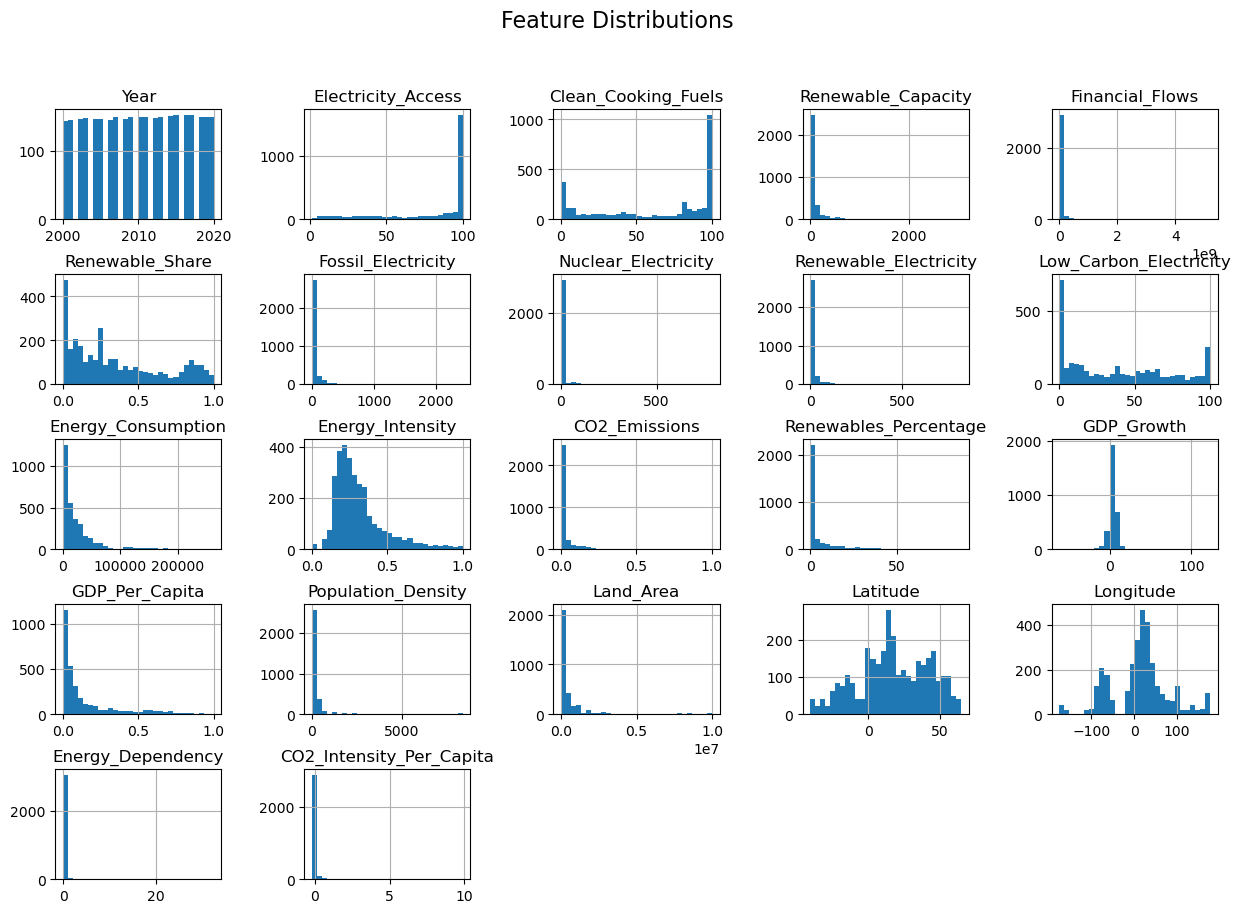

In [7]:
#Distribution Analysis

df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.5) 
plt.show()

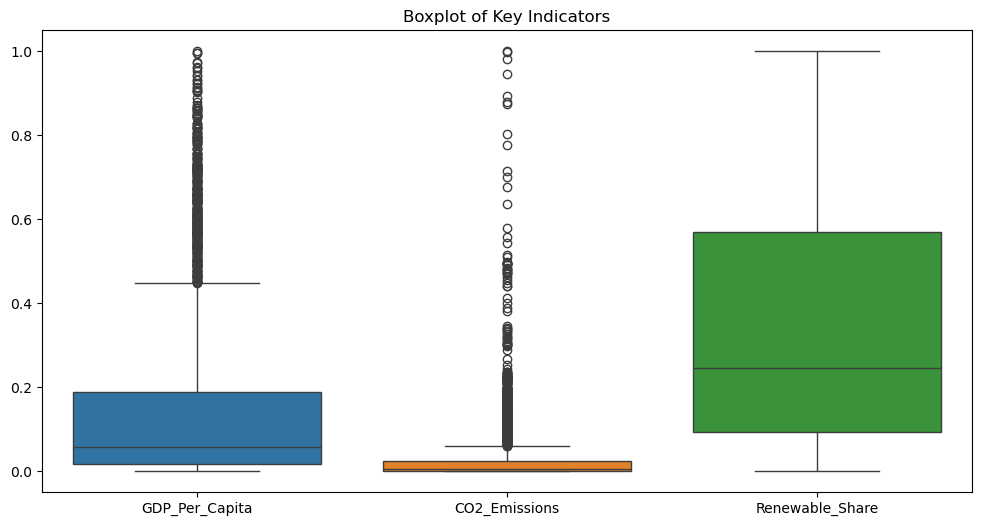

In [8]:
#Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["GDP_Per_Capita", "CO2_Emissions", "Renewable_Share"]])
plt.title("Boxplot of Key Indicators")
plt.show()

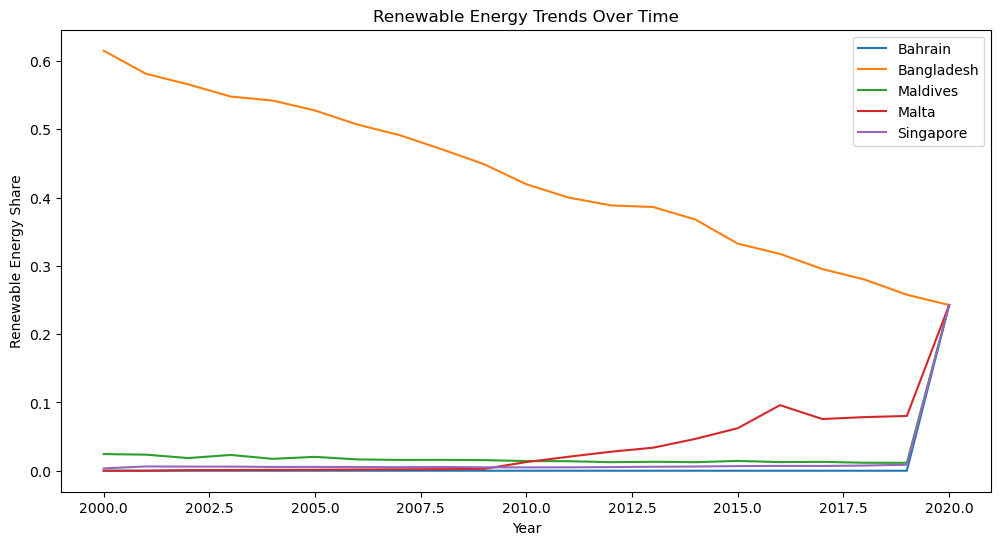

In [9]:
#Trend Analysis Over Time for Population densed countries
plt.figure(figsize=(12, 6))
for country in ["Bahrain", "Bangladesh", "Maldives", "Malta", "Singapore"]:
    subset = df[df["Entity"] == country]
    plt.plot(subset["Year"], subset["Renewable_Share"], label=country)

plt.xlabel("Year")
plt.ylabel("Renewable Energy Share")
plt.title("Renewable Energy Trends Over Time")
plt.legend()
plt.show()

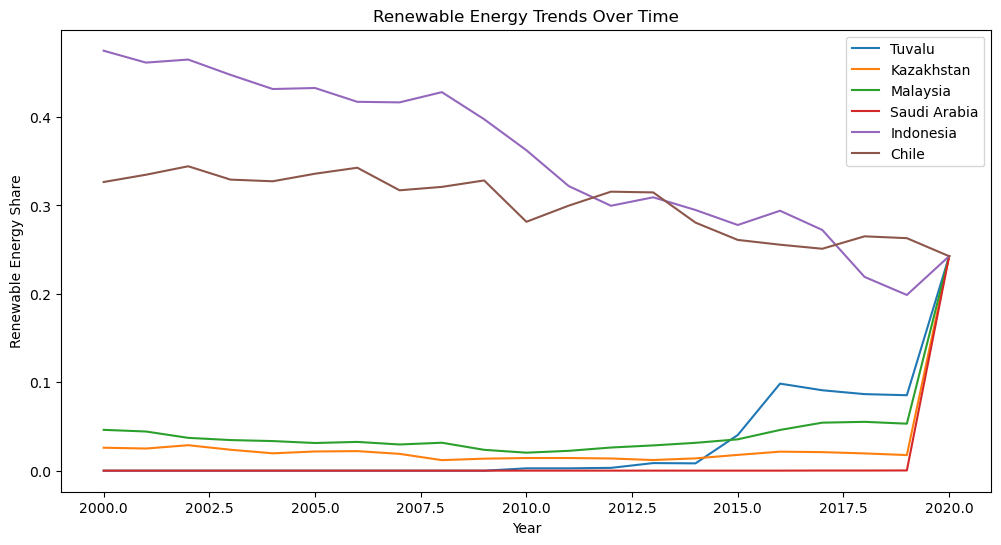

In [12]:
#Trend Analysis Over Time of Countries that didn't rely on Nuclear_Electricity
plt.figure(figsize=(12, 6))
for country in ["Tuvalu", "Kazakhstan", "Malaysia", "Saudi Arabia", "Indonesia", "Chile"]:
    subset = df[df["Entity"] == country]
    plt.plot(subset["Year"], subset["Renewable_Share"], label=country)

plt.xlabel("Year")
plt.ylabel("Renewable Energy Share")
plt.title("Renewable Energy Trends Over Time")
plt.legend()
plt.show()

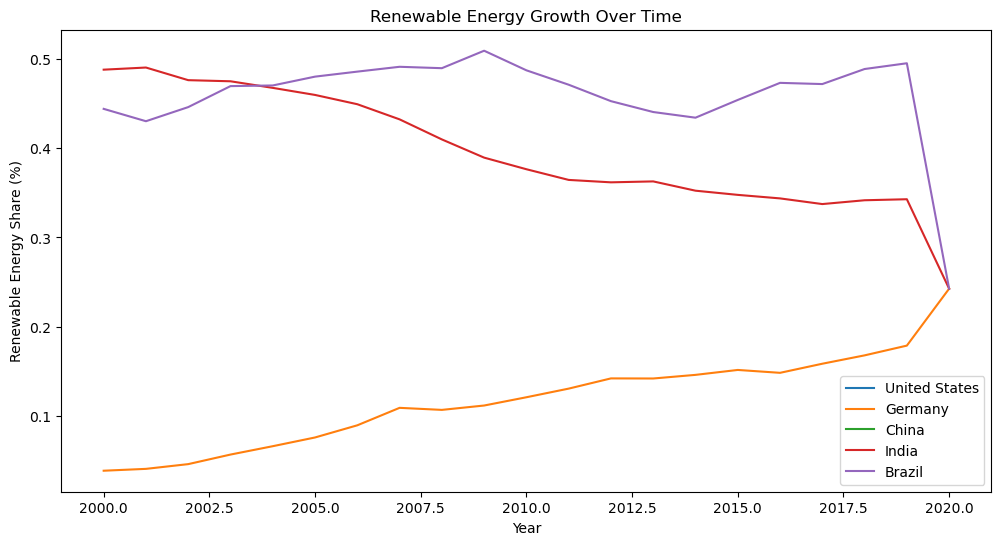

In [16]:
#Renewable Enrgy Growth Comparisons
selected_countries = ["United States", "Germany", "China", "India", "Brazil"]

plt.figure(figsize=(12, 6))
for country in selected_countries:
    subset = df[df["Entity"] == country]
    plt.plot(subset["Year"], subset["Renewable_Share"], label=country)

plt.xlabel("Year")
plt.ylabel("Renewable Energy Share (%)")
plt.title("Renewable Energy Growth Over Time")
plt.legend()
plt.show()

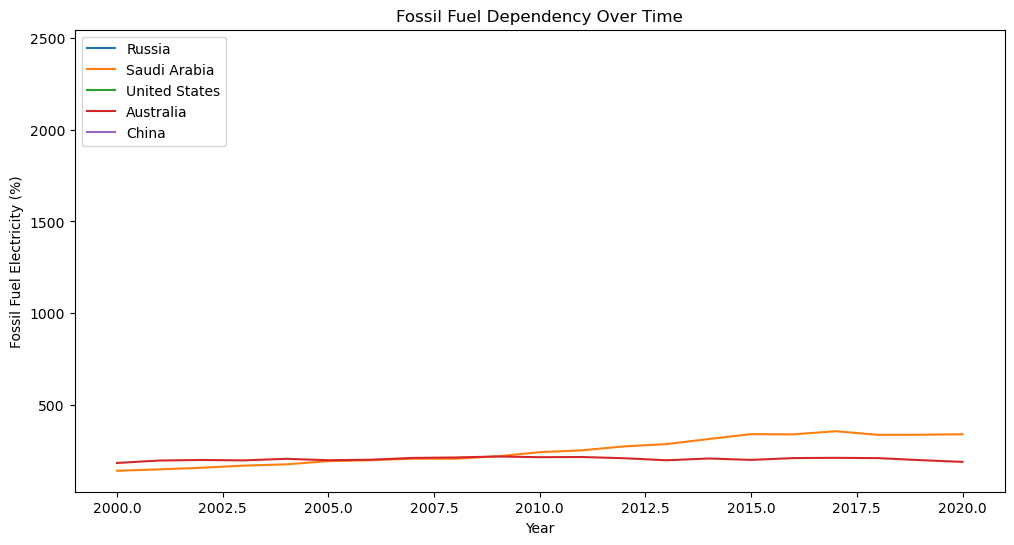

In [18]:
#Fossil Fuel Dependency Over Time 
selected_countries = ["Russia", "Saudi Arabia", "United States", "Australia", "China"]

plt.figure(figsize=(12, 6))
for country in selected_countries:
    subset = df[df["Entity"] == country]
    plt.plot(subset["Year"], subset["Fossil_Electricity"], label=country)

plt.xlabel("Year")
plt.ylabel("Fossil Fuel Electricity (%)")
plt.title("Fossil Fuel Dependency Over Time")
plt.legend()
plt.show()

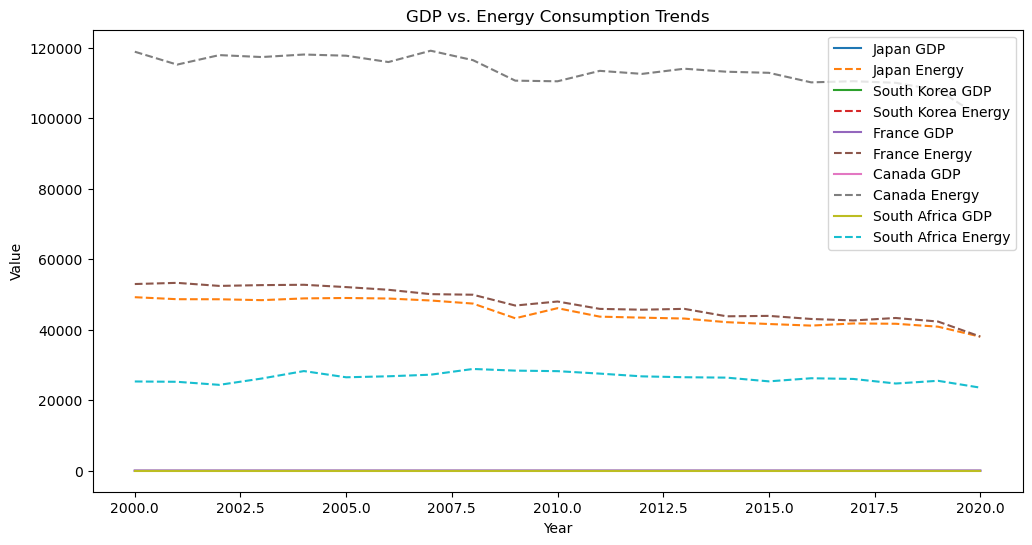

In [22]:
#GDP vs Energy Consumption Trends
selected_countries = ["Japan", "South Korea", "France", "Canada", "South Africa"]

plt.figure(figsize=(12, 6))
for country in selected_countries:
    subset = df[df["Entity"] == country]
    plt.plot(subset["Year"], subset["GDP_Per_Capita"], label=f"{country} GDP")
    plt.plot(subset["Year"], subset["Energy_Consumption"], label=f"{country} Energy", linestyle="dashed")

plt.xlabel("Year")
plt.ylabel("Value")
plt.title("GDP vs. Energy Consumption Trends")
plt.legend()
plt.show()

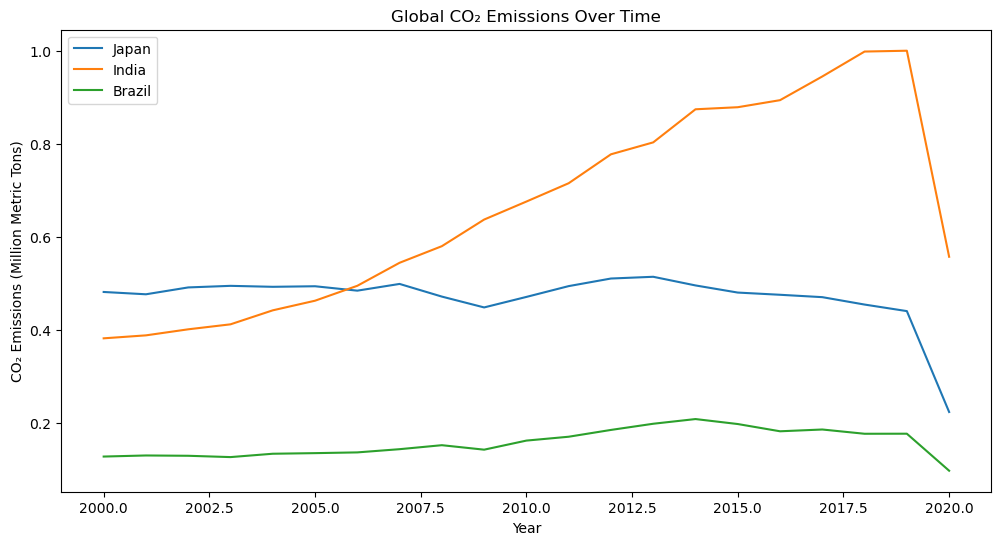

In [48]:
#CO₂ Emissions and Climate Commitment
selected_countries = [ "Japan", "India", "Brazil"]

plt.figure(figsize=(12, 6))
for country in selected_countries:
    subset = df[df["Entity"] == country]
    plt.plot(subset["Year"], subset["CO2_Emissions"], label=country)

plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Metric Tons)")
plt.title("Global CO₂ Emissions Over Time")
plt.legend()
plt.show()

In [36]:
print(df[df["Entity"] == "United States"])

             Entity  Year  Electricity_Access  Clean_Cooking_Fuels  \
3046  United States  2020               100.0                100.0   

      Renewable_Capacity  Financial_Flows  Renewable_Share  \
3046                 0.0              0.0         0.242607   

      Fossil_Electricity  Nuclear_Electricity  Renewable_Electricity  ...  \
3046              2431.9               789.88                  821.4  ...   

      CO2_Emissions  Renewables_Percentage  GDP_Growth  GDP_Per_Capita  \
3046       0.981798              10.532232   -3.404592        0.879027   

      Population_Density  Land_Area  Latitude  Longitude  Energy_Dependency  \
3046                36.0  9833517.0  37.09024 -95.712891          -0.144614   

      CO2_Intensity_Per_Capita  
3046                  4.121282  

[1 rows x 23 columns]


In [30]:
import plotly.express as px

Interactive Renewable Energy Trends: 

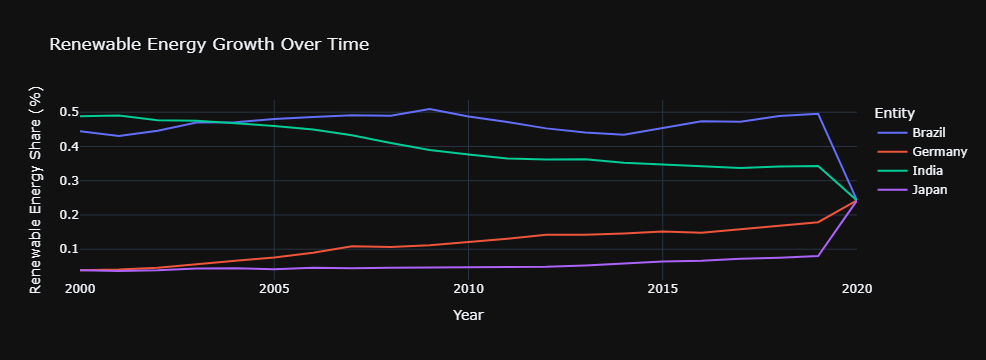

In [52]:
fig = px.line(df[df["Entity"].isin([ "Germany", "Japan", "India", "Brazil"])],
              x="Year", y="Renewable_Share", color="Entity",
              title="Renewable Energy Growth Over Time",
              labels={"Renewable_Share": "Renewable Energy Share (%)"},
              template="plotly_dark")

fig.show()

In [ ]:
Interactive Renewable Energy Trends: 

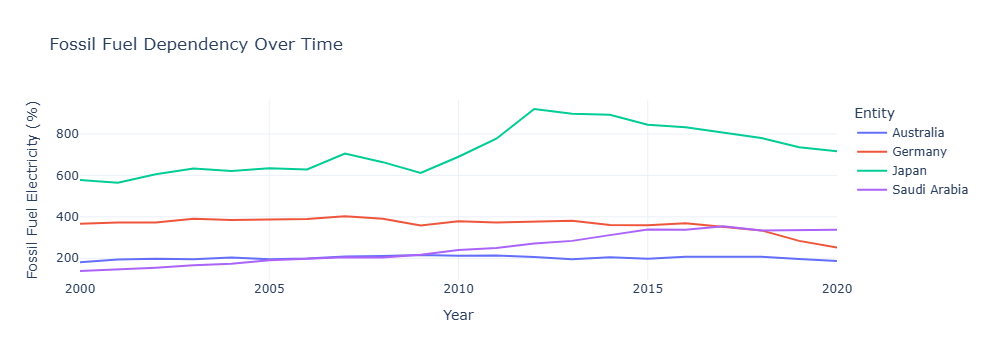

In [62]:
#Interactive Fossil Fuel Dependency Over Time
fig = px.line(df[df["Entity"].isin(["Japan", "Saudi Arabia", "Australia", "Germany"])],
              x="Year", y="Fossil_Electricity", color="Entity",
              title="Fossil Fuel Dependency Over Time",
              labels={"Fossil_Electricity": "Fossil Fuel Electricity (%)"},
              template="plotly_white")

fig.show()

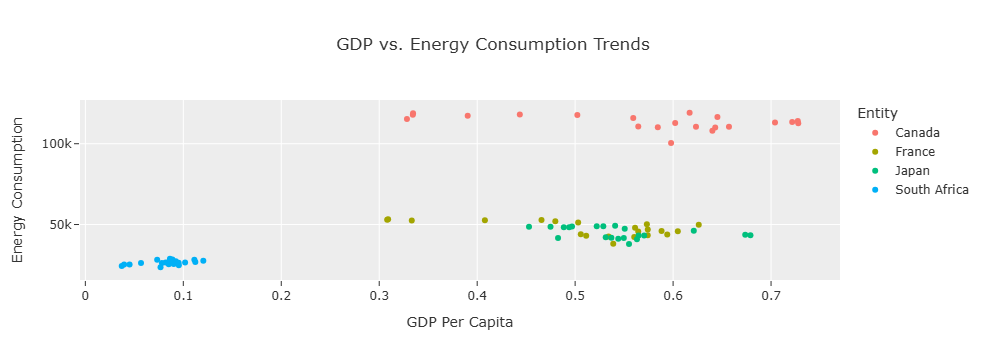

In [64]:
#Interactive CO2 Emissions Over Time

fig = px.scatter(df[df["Entity"].isin(["Japan", "South Korea", "France", "Canada", "South Africa"])],
                 x="GDP_Per_Capita", y="Energy_Consumption", color="Entity",
                 title="GDP vs. Energy Consumption Trends",
                 hover_data=["Year"],
                 labels={"GDP_Per_Capita": "GDP Per Capita", "Energy_Consumption": "Energy Consumption"},
                 template="ggplot2")

fig.show()

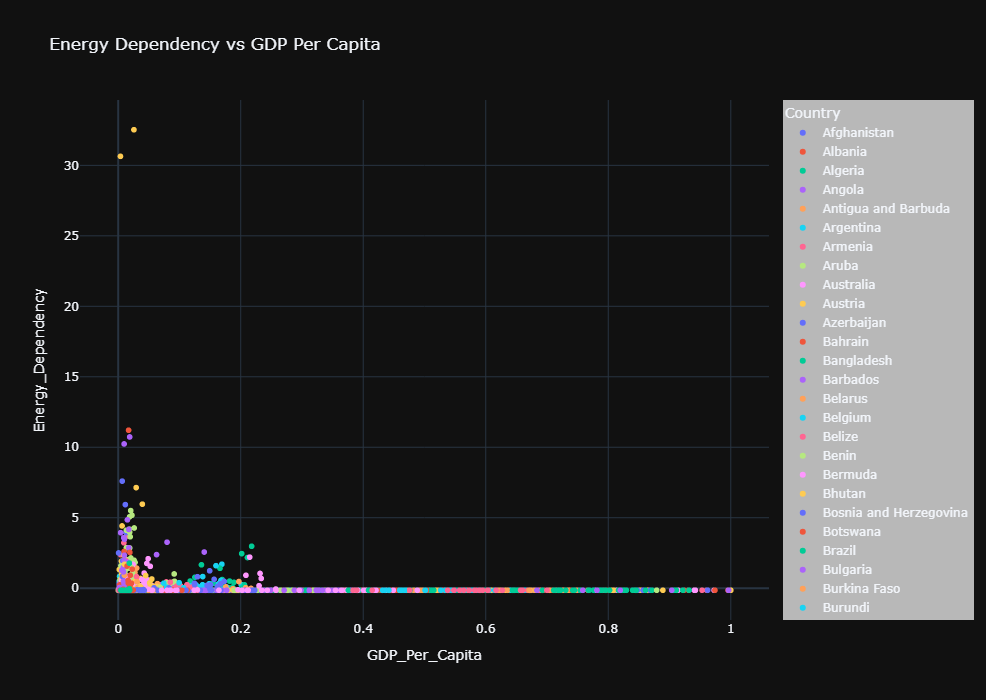

In [76]:
fig = px.scatter(df, x="GDP_Per_Capita", y="Energy_Dependency", color="Entity",
                 title="Energy Dependency vs GDP Per Capita", template="plotly_dark",
                 hover_data=["Year"])

# Increase figure size and adjust legend
fig.update_layout(
    width=1200, height=700,  # Larger figure size
    legend_title="Country",  # Rename legend title
    legend=dict(
        x=1.02, y=1,  # Move legend outside the plot
        bgcolor="rgba(255,255,255,0.7)",  # Semi-transparent background for readability
        font=dict(size=12)  # Increase font size
    )
)

fig.show()

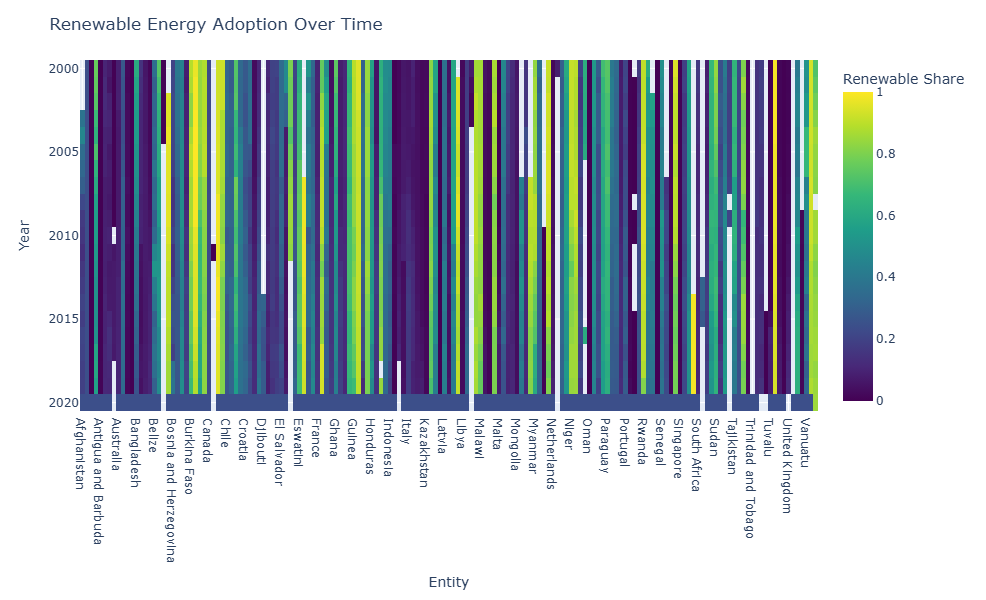

In [86]:
renewables_pivot = df.pivot(index="Year", columns="Entity", values="Renewable_Share")
fig = px.imshow(renewables_pivot,
                labels=dict(x="Entity", y="Year", color="Renewable Share"),
                x=renewables_pivot.columns,
                y=renewables_pivot.index,
                color_continuous_scale="viridis")

fig.update_layout(title="Renewable Energy Adoption Over Time", width=1000, height=600)
fig.show()

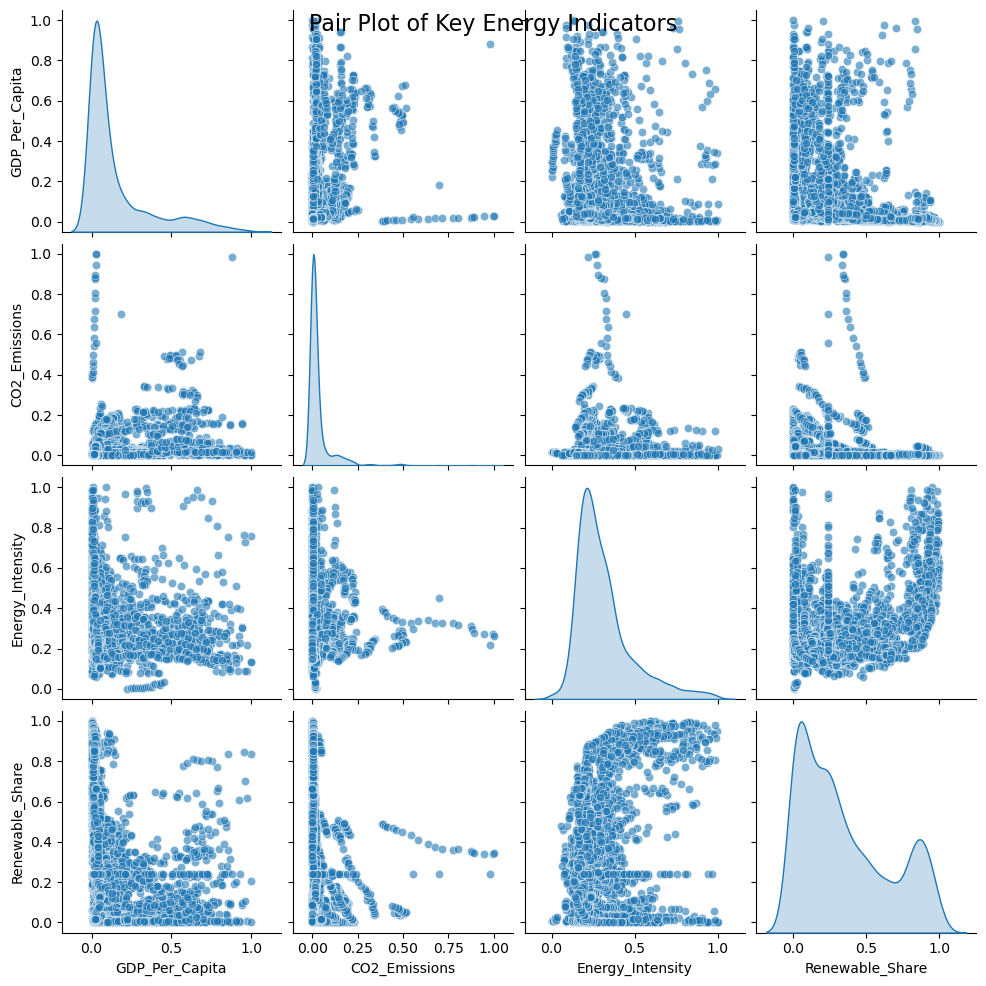

In [102]:
selected_features = ["GDP_Per_Capita", "CO2_Emissions", "Energy_Intensity", "Renewable_Share"]
sns.pairplot(df[selected_features], diag_kind="kde", plot_kws={"alpha": 0.6})
plt.suptitle("Pair Plot of Key Energy Indicators", fontsize=16)
plt.show()

In [ ]:
entity_mapping = dict(zip(df["Entity"].astype("category").cat.categories, range(len(df["Entity"].astype("category").cat.categories))))
print(entity_mapping)

In [ ]:
df["Entity"] = df["Entity"].astype("category").cat.codes

In [ ]:
#Correlation Analysis
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()